In [1]:
import scipy._lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data 
data = pd.read_csv('data.csv')

In [3]:
# transfer the date type
data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')

In [4]:
data.describe(include=['number']) # basic data description 

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


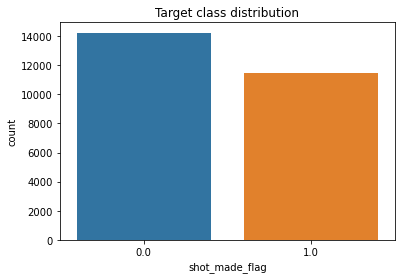

In [5]:
#Data visualization 
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

Text(0.5, 1.0, 'location of all shots')

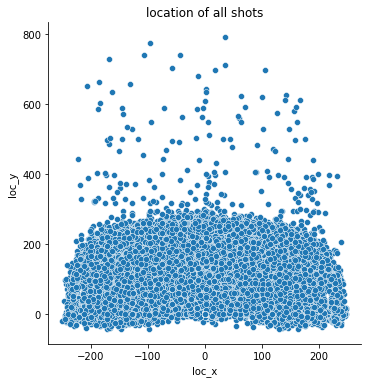

In [6]:
#plot the location of all shots
sns.relplot(x="loc_x", y="loc_y", data=data)
plt.title('location of all shots')

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

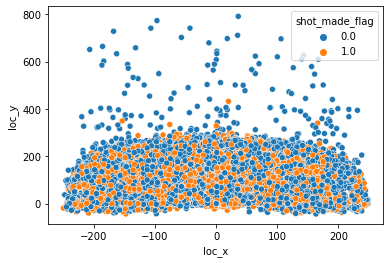

In [7]:
#plot the locations of all shots attempted ( categoried by success/fail status)
sns.scatterplot(data=data, x="loc_x", y="loc_y", hue="shot_made_flag")

Text(0.5, 1.0, 'histogram of minutes remaining of each shot')

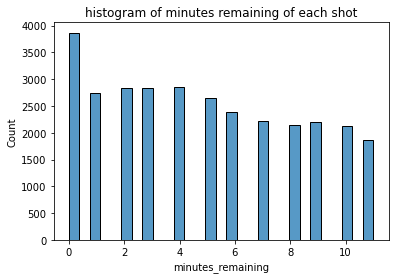

In [8]:
# plot the histogram of minutes remaining of each shot
sns.histplot(data=data,x='minutes_remaining')
plt.title('histogram of minutes remaining of each shot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='shot_made_flag', ylabel='count'>

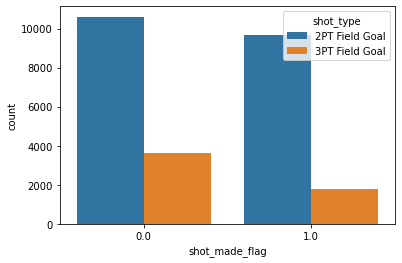

In [9]:
sns.countplot('shot_made_flag',hue='shot_type',data=data)


Text(0.5, 1.0, 'Correlation heatmap of all numeric variables')

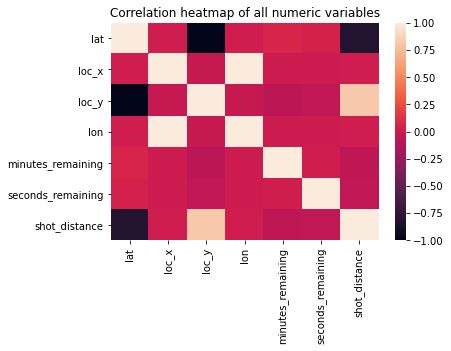

In [10]:
#show the correlation heatmap of all numeric variables
d=data.select_dtypes(include=['number'])
d.corr()
sns.heatmap(d.corr())
plt.title('Correlation heatmap of all numeric variables')

In [11]:
# preprocess the data
data = pd.read_csv('data.csv')
# drop NaN values
data=data.dropna()
# drop all ID and date variable 
del data['game_event_id']
del data['game_id']
del data['game_date']
del data['team_name'] # team name is always LA Lakers
del data['lat'] # lat is the same as loc_x
del data['lon'] # lon is the same as loc_y
del data['team_id'] # team is is always one number 
del data['shot_id']



In [12]:
# create y variable
y=data['shot_made_flag']

#encode the nominal variables 
nominal_variables=['action_type', 'combined_shot_type', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_type','shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'matchup',
       'opponent']

# transfer the nominal varibles into dummy variables
del data['shot_made_flag']
for variable in nominal_variables:
    dummies = pd.get_dummies(data[variable])
    dummies = dummies.add_prefix("{}#".format(variable))
    data.drop(variable, axis=1, inplace=True)
    data = data.join(dummies)

In [13]:
# check all the dummy variables
data.columns

Index(['loc_x', 'loc_y', 'minutes_remaining', 'shot_distance',
       'action_type#Alley Oop Dunk Shot', 'action_type#Alley Oop Layup shot',
       'action_type#Cutting Layup Shot', 'action_type#Driving Bank shot',
       'action_type#Driving Dunk Shot',
       'action_type#Driving Finger Roll Layup Shot',
       ...
       'opponent#PHI', 'opponent#PHX', 'opponent#POR', 'opponent#SAC',
       'opponent#SAS', 'opponent#SEA', 'opponent#TOR', 'opponent#UTA',
       'opponent#VAN', 'opponent#WAS'],
      dtype='object', length=281)

In [14]:
# feature selection 
from sklearn.ensemble import  RandomForestClassifier # import random_forest classifier
randomforest = RandomForestClassifier()  
randomforest.fit(data, y) # run the random forest model
important_features = pd.DataFrame(randomforest.feature_importances_, index=data.columns, columns=["importance"])
# select the top 20 inportant features ( including dummy variables)
top20 = important_features.sort_values("importance", ascending=False).head(20).index  
print(top20) # print the top20 features

Index(['loc_y', 'loc_x', 'minutes_remaining', 'shot_distance',
       'action_type#Jump Shot', 'action_type#Layup Shot',
       'combined_shot_type#Dunk', 'period#3', 'period#2', 'period#1',
       'period#4', 'action_type#Running Jump Shot', 'playoffs#1', 'playoffs#0',
       'season#2005-06', 'season#2002-03', 'season#2008-09', 'season#2007-08',
       'action_type#Driving Layup Shot', 'season#2009-10'],
      dtype='object')


In [15]:
# use the top 20 important features to generate the X variable for modeling
x=data[['loc_y', 'loc_x', 'minutes_remaining', 'shot_distance',
       'action_type#Jump Shot', 'action_type#Layup Shot', 'period#3',
       'period#1', 'period#2', 'period#4', 'combined_shot_type#Dunk',
       'combined_shot_type#Jump Shot', 'action_type#Running Jump Shot',
       'playoffs#1', 'playoffs#0', 'shot_zone_area#Center(C)',
       'season#2005-06', 'season#2008-09', 'action_type#Driving Layup Shot',
       'season#2007-08']]


In [16]:
# let's run the logistic regression model!
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# first step: split the train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#define and run the logistic regression model 
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [17]:
#evaluate the model in terms of accuarcy score
score = model.score(x_test, y_test)
print(score)
# accuracy socre is 68%

0.675875486381323


In [18]:
#another way to see the performance of the model: confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[2411,  455],
       [1211, 1063]])

Text(0.5, 1.0, 'accuracy score under different random states')

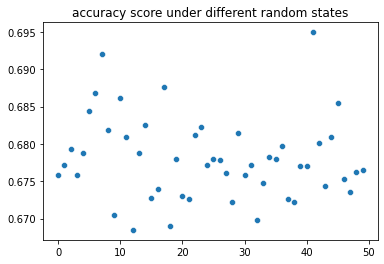

In [19]:
# let's see if change in random_state can affect the accuracy score

rs_list=[] # random state list
acc_score_list=[] # empty accuracy score list

for i in range(50):
    rs_list.append(i)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    acc_score_list.append(score)

# plot the relationship between random_state and accuracy score
sns.scatterplot(y=acc_score_list, x=rs_list)
plt.title('accuracy score under different random states')